In [75]:
# Torch Dependencies
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torch.autograd import Variable

# Importing Other Dependencies
import csv
import random
from PIL import Image
import math
import time
from tqdm import tqdm
import pickle
import datetime

In [76]:
# Function for showing image from vector form (4725 long numpy vector)
def show_img_vec(img_vec):
    img_vec_shaped = img_vec.reshape(45,35,3)
    plt.imshow(img_vec_shaped)

In [77]:
# Importing pickle - reduces time to import from .jpg from >3 hours to ~3 seconds.
    # The pickle is of type numpy array (202600 x 4725)
X_array = pickle.load( open( "X_array.p", "rb" ) )

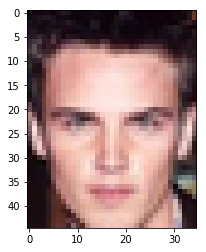

In [78]:
# show_img_vec(X_array[200000])
X_array.shape

test_torch_tensor = torch.from_numpy(X_array[200000])
show_img_vec(test_torch_tensor.numpy())

In [79]:
# Creating Model!
# This will be a relatively un-advanced densely connected model that will reduce the size by
    # factor of ~17 (to a 300-dimensional vector) and attempts to reconstruct it. 

class Autoencoder_One(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder_One, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, input_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
    
    def compress(self, x):
        out = self.fc1(x)
        return out

tensor([[252., 239., 207.,  ..., 243., 170., 132.],
        [252., 239., 207.,  ..., 243., 170., 132.]])


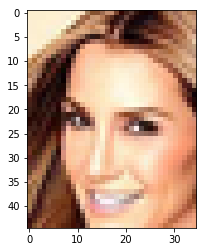

In [80]:
learning_rate = 0.001
num_epochs =  27000

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Setting up data as tensor and Variable
Tensor_X = torch.from_numpy(X_array[0:2000]).float()
print(Tensor_X)
Variable_X = Variable(Tensor_X)

# Setting up loss function
loss_fn = nn.MSELoss()

# Initializing model
model_1 = Autoencoder_One(4725, 400)

# Setting up optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate, nesterov=True, momentum = 0.9, dampening = 0)

# Testing Tensor_X
show_img_vec( (Tensor_X[1].int()).numpy() )

In [81]:
print("H")
for epoch in range(num_epochs):
    model_1.train()
    optimizer.zero_grad()
    Pred_X = model_1(Variable_X)
    loss = loss_fn(Pred_X, Variable_X)
    loss.backward()
    optimizer.step()

    model_1.eval()
    train_loss.append(float(loss.data))


#     test_results = test_model(simple_rick, testor_y, testor_X, tensor_y, tensor_X)

#     train_accuracy.append(test_results[1])
#     test_accuracy.append(test_results[0])

    if epoch % 100 == 0:
        print("=========="+str(epoch)+"==========")
        print("Loss: ",float(loss))
        print(datetime.datetime.now())
        train_loss.append(float(loss))
#         print("Test Accuracy: ",test_results[0])
#         print("Train Accuracy: ",test_results[1])
#         out_vec = model_1(Tensor_X[0])
#         out_vec = out_vec.detach().numpy()
#         show_img_vec(out_vec)

H
==========0==========
Loss:  29367.572265625
2019-02-11 01:55:17.283813
==========100==========
Loss:  28099.5390625
2019-02-11 01:55:18.928581
==========200==========
Loss:  28075.759765625
2019-02-11 01:55:20.297906
==========300==========
Loss:  28052.001953125
2019-02-11 01:55:21.797278
==========400==========
Loss:  28028.263671875
2019-02-11 01:55:23.366058
==========500==========
Loss:  28004.544921875
2019-02-11 01:55:25.143299
==========600==========
Loss:  27980.845703125
2019-02-11 01:55:26.971364
==========700==========
Loss:  27957.16796875
2019-02-11 01:55:28.768721
==========800==========
Loss:  27933.509765625
2019-02-11 01:55:31.108110
==========900==========
Loss:  27909.87109375
2019-02-11 01:55:36.415387
==========1000==========
Loss:  27886.25390625
2019-02-11 01:55:43.715099
==========1100==========
Loss:  27862.654296875
2019-02-11 01:55:51.112620
==========1200==========
Loss:  27839.076171875
2019-02-11 01:55:59.028075
==========1300==========
Loss:  27815.51

==========11100==========
Loss:  25600.916015625
2019-02-11 02:08:01.583412
==========11200==========
Loss:  25579.25
2019-02-11 02:08:08.992836
==========11300==========
Loss:  25557.60546875
2019-02-11 02:08:16.364809
==========11400==========
Loss:  25535.9765625
2019-02-11 02:08:23.397305
==========11500==========
Loss:  25514.3671875
2019-02-11 02:08:30.500193
==========11600==========
Loss:  25492.77734375
2019-02-11 02:08:37.593525
==========11700==========
Loss:  25471.203125
2019-02-11 02:08:44.691144
==========11800==========
Loss:  25449.6484375
2019-02-11 02:08:51.615048
==========11900==========
Loss:  25428.11328125
2019-02-11 02:08:58.476889
==========12000==========
Loss:  25406.595703125
2019-02-11 02:09:05.409357
==========12100==========
Loss:  25385.095703125
2019-02-11 02:09:12.282522
==========12200==========
Loss:  25363.61328125
2019-02-11 02:09:19.190367
==========12300==========
Loss:  25342.150390625
2019-02-11 02:09:26.073736
==========12400==========
Loss: 

==========22100==========
Loss:  23324.46875
2019-02-11 02:20:48.957276
==========22200==========
Loss:  23304.734375
2019-02-11 02:20:56.553294
==========22300==========
Loss:  23285.013671875
2019-02-11 02:21:03.421273
==========22400==========
Loss:  23265.306640625
2019-02-11 02:21:10.672734
==========22500==========
Loss:  23245.6171875
2019-02-11 02:21:19.382890
==========22600==========
Loss:  23225.947265625
2019-02-11 02:21:26.678117
==========22700==========
Loss:  23206.294921875
2019-02-11 02:21:33.735344
==========22800==========
Loss:  23186.658203125
2019-02-11 02:21:40.975913
==========22900==========
Loss:  23167.033203125
2019-02-11 02:21:48.044435
==========23000==========
Loss:  23147.42578125
2019-02-11 02:21:55.156349
==========23100==========
Loss:  23127.841796875
2019-02-11 02:22:02.352864
==========23200==========
Loss:  23108.271484375
2019-02-11 02:22:09.455273
==========23300==========
Loss:  23088.71484375
2019-02-11 02:22:16.521891
==========23400========

tensor([252., 239., 207.,  ..., 243., 170., 132.])
[27 25 22 ... 26 18 14]


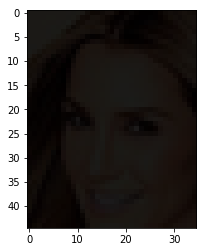

In [82]:
face_num = 1

out_vec = model_1(Variable(Tensor_X[face_num]))
out_vec = model_1(Tensor_X[face_num])
# print(out_vec)
print(Tensor_X[face_num])

out_vec = out_vec.detach().int().numpy()
print(out_vec)

# print(loss_fn(torch.from_numpy(out_vec), Tensor_X[face_num]))
show_img_vec( out_vec )